# Data Cleaning Process

## 1. Import Libraries

In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Load dataset

In [2]:
df = pd.read_csv("../data/processed/lat_lon_imputed.csv") 

In [3]:
df_training = df.copy()
df_training.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [4]:
df_training = df_training.set_index('id')

In [ ]:
### Categorical Columns
- permit

#### Categorical columns to be removed

##### Columns to remove at first

In [ ]:
# Dropping the columns that don't provide useful information or have very high number of missing values in initial oberservation.
df_training = df_training.drop(['wpt_name', 'recorded_by','num_private','public_meeting'], axis=1) # , 'scheme_name'
df_training.shape

(59400, 38)

##### Columns to analyze together:
- funder, installer, *scheme_name


**funder**
Lets check if lowering case can help.

In [13]:
df_training['water_quality'].value_counts()

water_quality
0    50818
1     4856
3     1876
2      804
5      490
6      339
4      200
7       17
Name: count, dtype: int64

Little difference with lowercase. Needs performing more cleaning.

In [8]:
df_training['installer'].value_counts()

installer
DWE           17402
Government     1825
RWE            1206
Commu          1060
DANIDA         1050
              ...  
SAIDI CO          1
SOLIDARM          1
Filber            1
Tanza             1
Hasawa            1
Name: count, Length: 2145, dtype: int64

In [7]:
df_training['installer'] = df_training['installer'].astype(str).str.lower()
df_training['installer'].value_counts()

installer
dwe                      17405
nan                       3655
government                1891
hesawa                    1395
rwe                       1206
                         ...  
luleka                       1
tlc/seleman mang'ombe        1
tasaf and mmem               1
caltaz kahama                1
hasawa                       1
Name: count, Length: 1936, dtype: int64

#### Numeric Columns

### Finding correlation between numeric columns

The values more than ±0.5 show stronger relation between columns

Below is the correlation matrix of the numeric only values, we can later create for categorical columns as well.


In [9]:
# Map the categorical values to numerical values
status_mapping = {'functional': 1, 'non functional': 0, 'functional needs repair': 2}
df_training['status_group'] = df_training['status_group'].map(status_mapping)

# Calculate the correlation matrix
correlation_matrix = df_training.select_dtypes(include='number').corr()

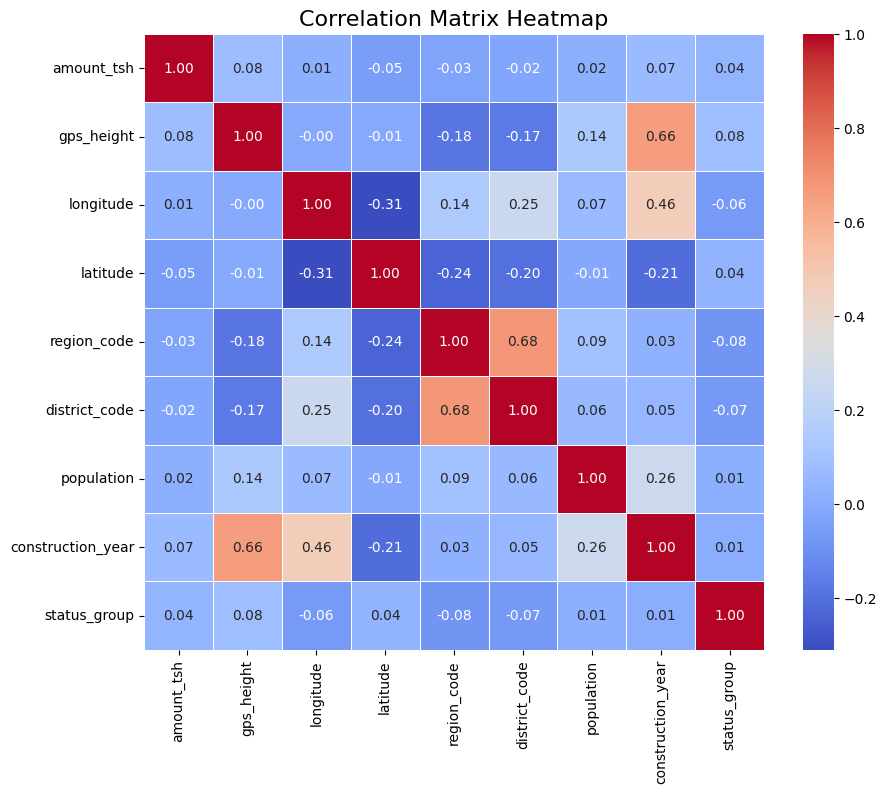

In [8]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title
plt.title("Correlation Matrix Heatmap", fontsize=16)

# Show the plot
plt.show()

In [10]:
categorical_columns = [
    'date_recorded','funder', 'installer','subvillage','lga','ward', 'basin', 'scheme_management', 'permit', 
    'extraction_type', 'extraction_type_group','extraction_type_class', 'management', 'management_group','payment_type', 'payment', 'water_quality', 
    'quantity', 'quality_group', 'source','source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group'
]

for column in categorical_columns:
    df_training[column], _ = pd.factorize(df_training[column])

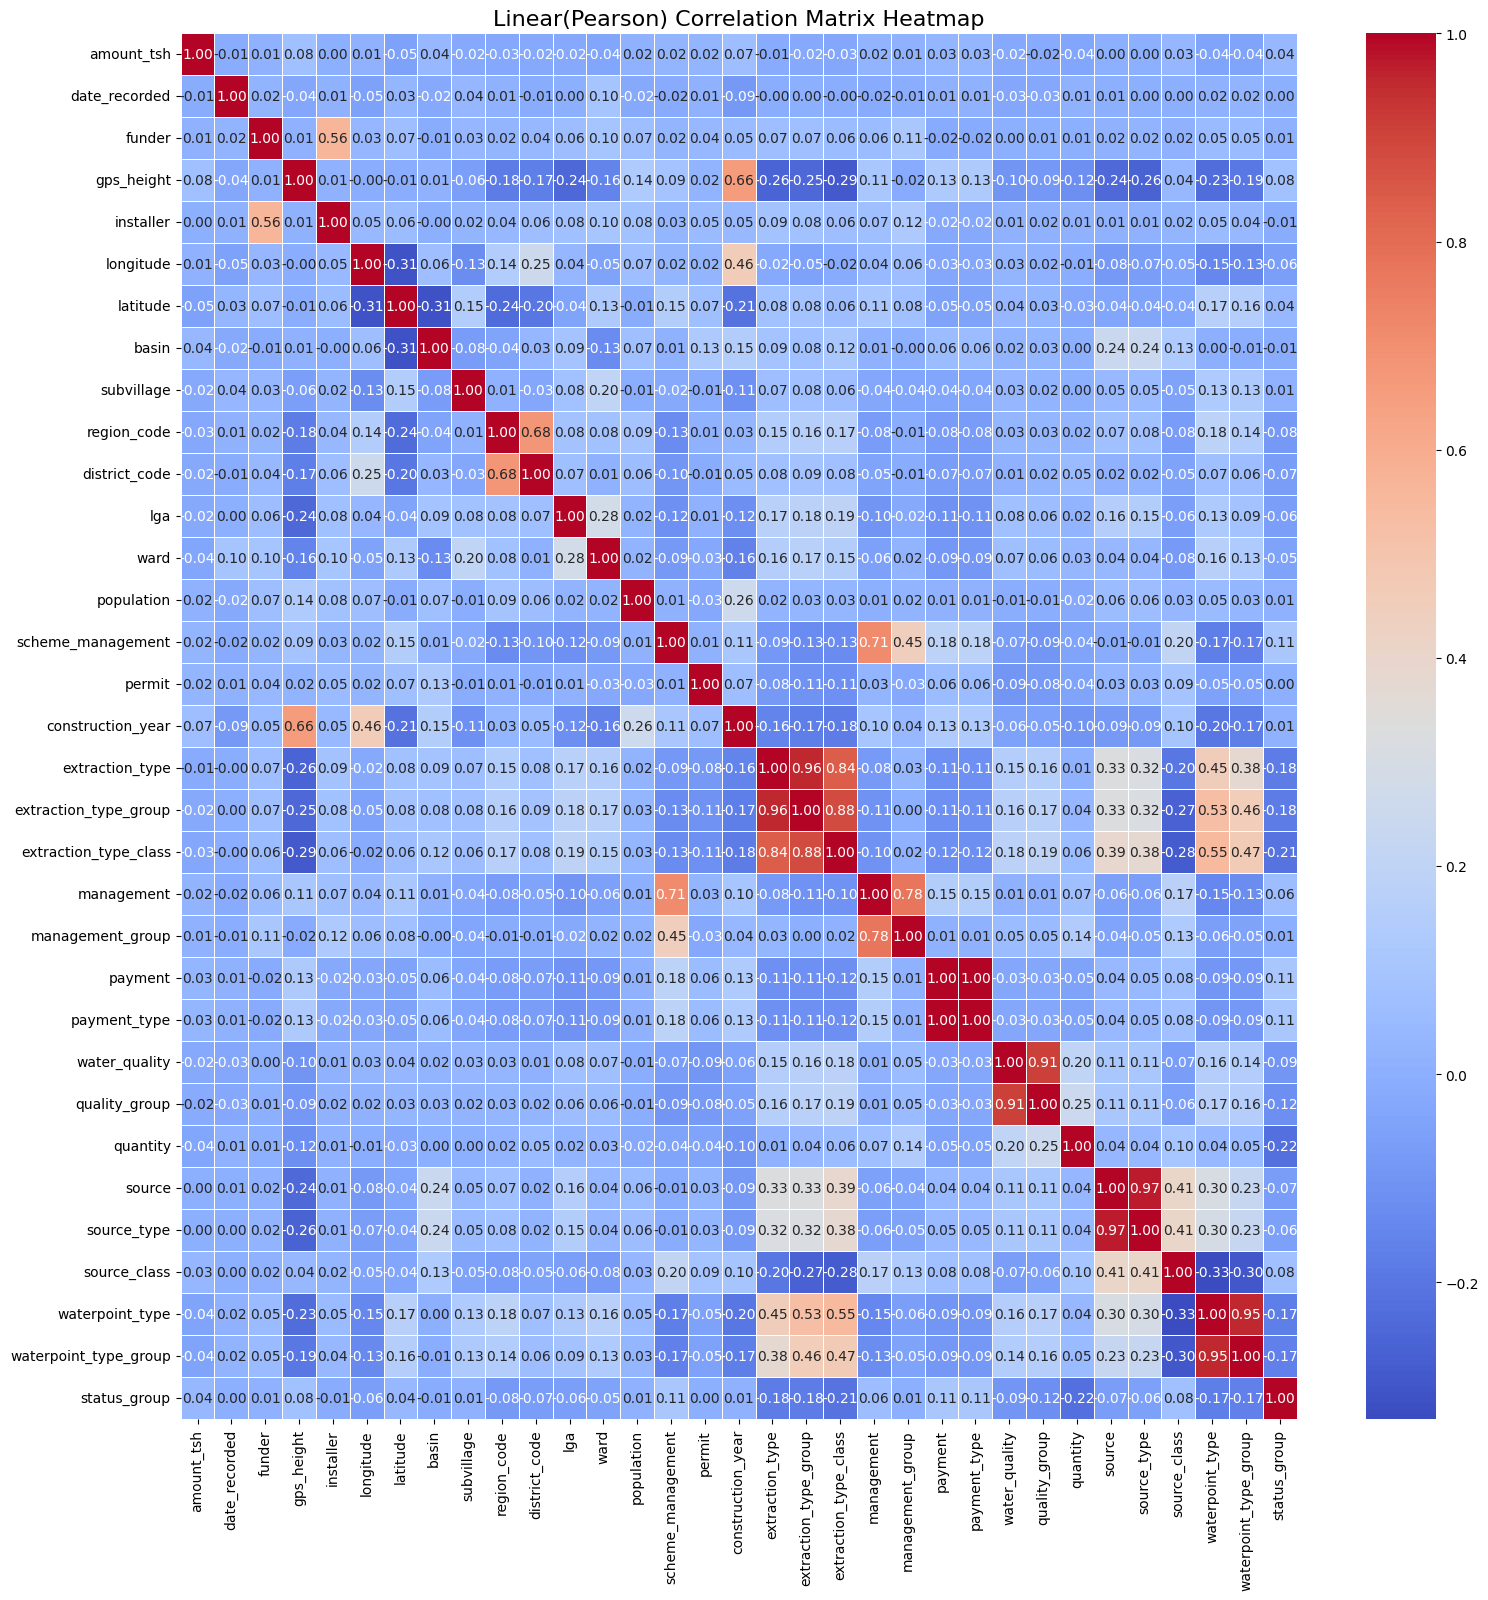

In [11]:
# Recalculate the correlation matrix
correlation_matrix = df_training.select_dtypes(include='number').corr()

# Set up the matplotlib figure
plt.figure(figsize=(18, 18))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title
plt.title("Linear(Pearson) Correlation Matrix Heatmap", fontsize=16)

# Show the plot
plt.show()

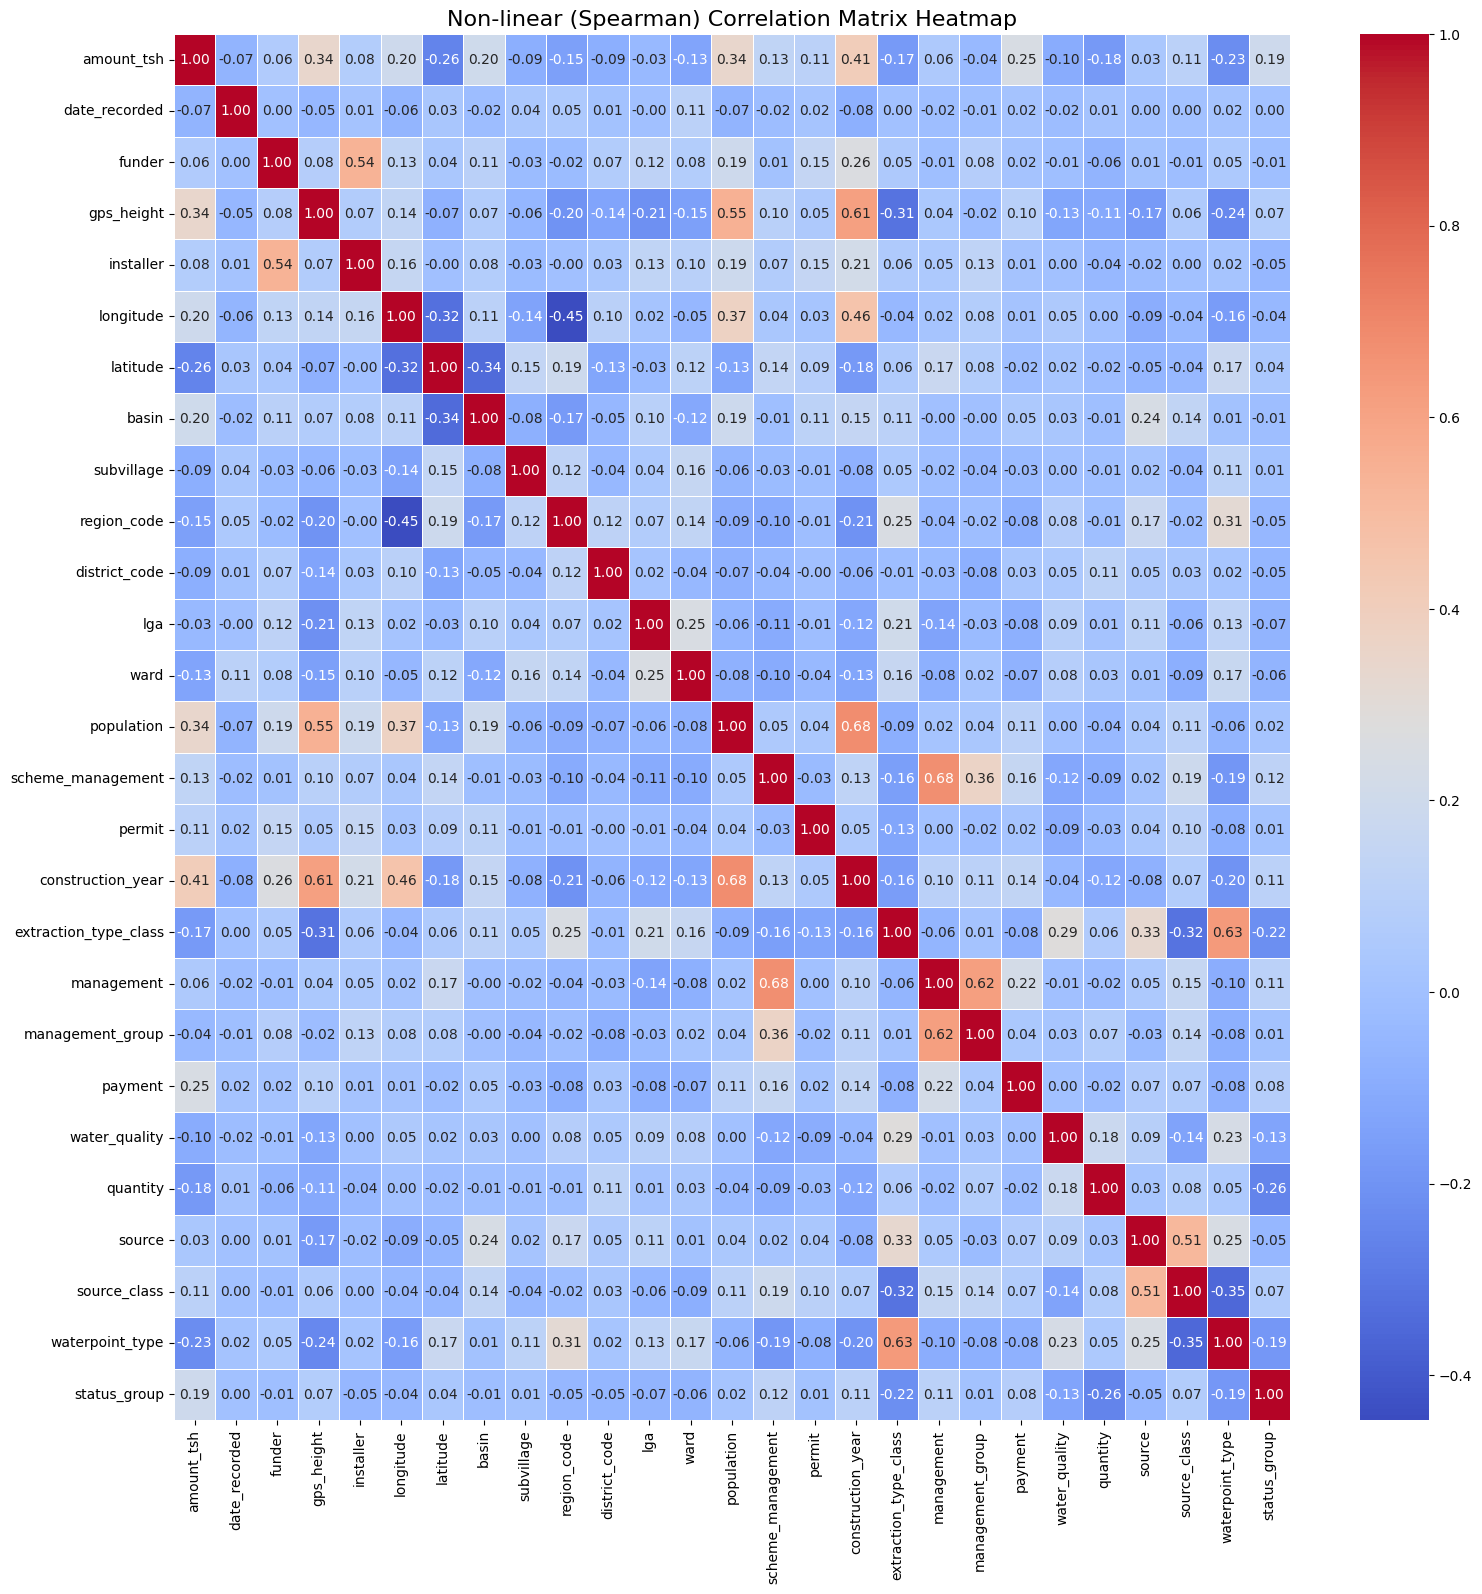

In [16]:
# Recalculate the correlation matrix
correlation_matrix = df_training.select_dtypes(include='number').corr(method='spearman')

# Set up the matplotlib figure
plt.figure(figsize=(18, 18))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title
plt.title("Non-linear (Spearman) Correlation Matrix Heatmap", fontsize=16)

# Show the plot
plt.show()

In [19]:
df_training.to_csv("../data/processed/lat_lon_imputed_cleaned.csv", index=False)

In [12]:
df_training = df_training.drop(['region','scheme_name','quantity_group','extraction_type','extraction_type_group','payment_type','quality_group','source_type','waterpoint_type_group'], axis=1) # 'public_meeting'
df_training.shape

(59400, 27)

In [17]:
df_training.to_csv("../data/processed/lat_lon_imputed_cleaned_2.csv", index=False)

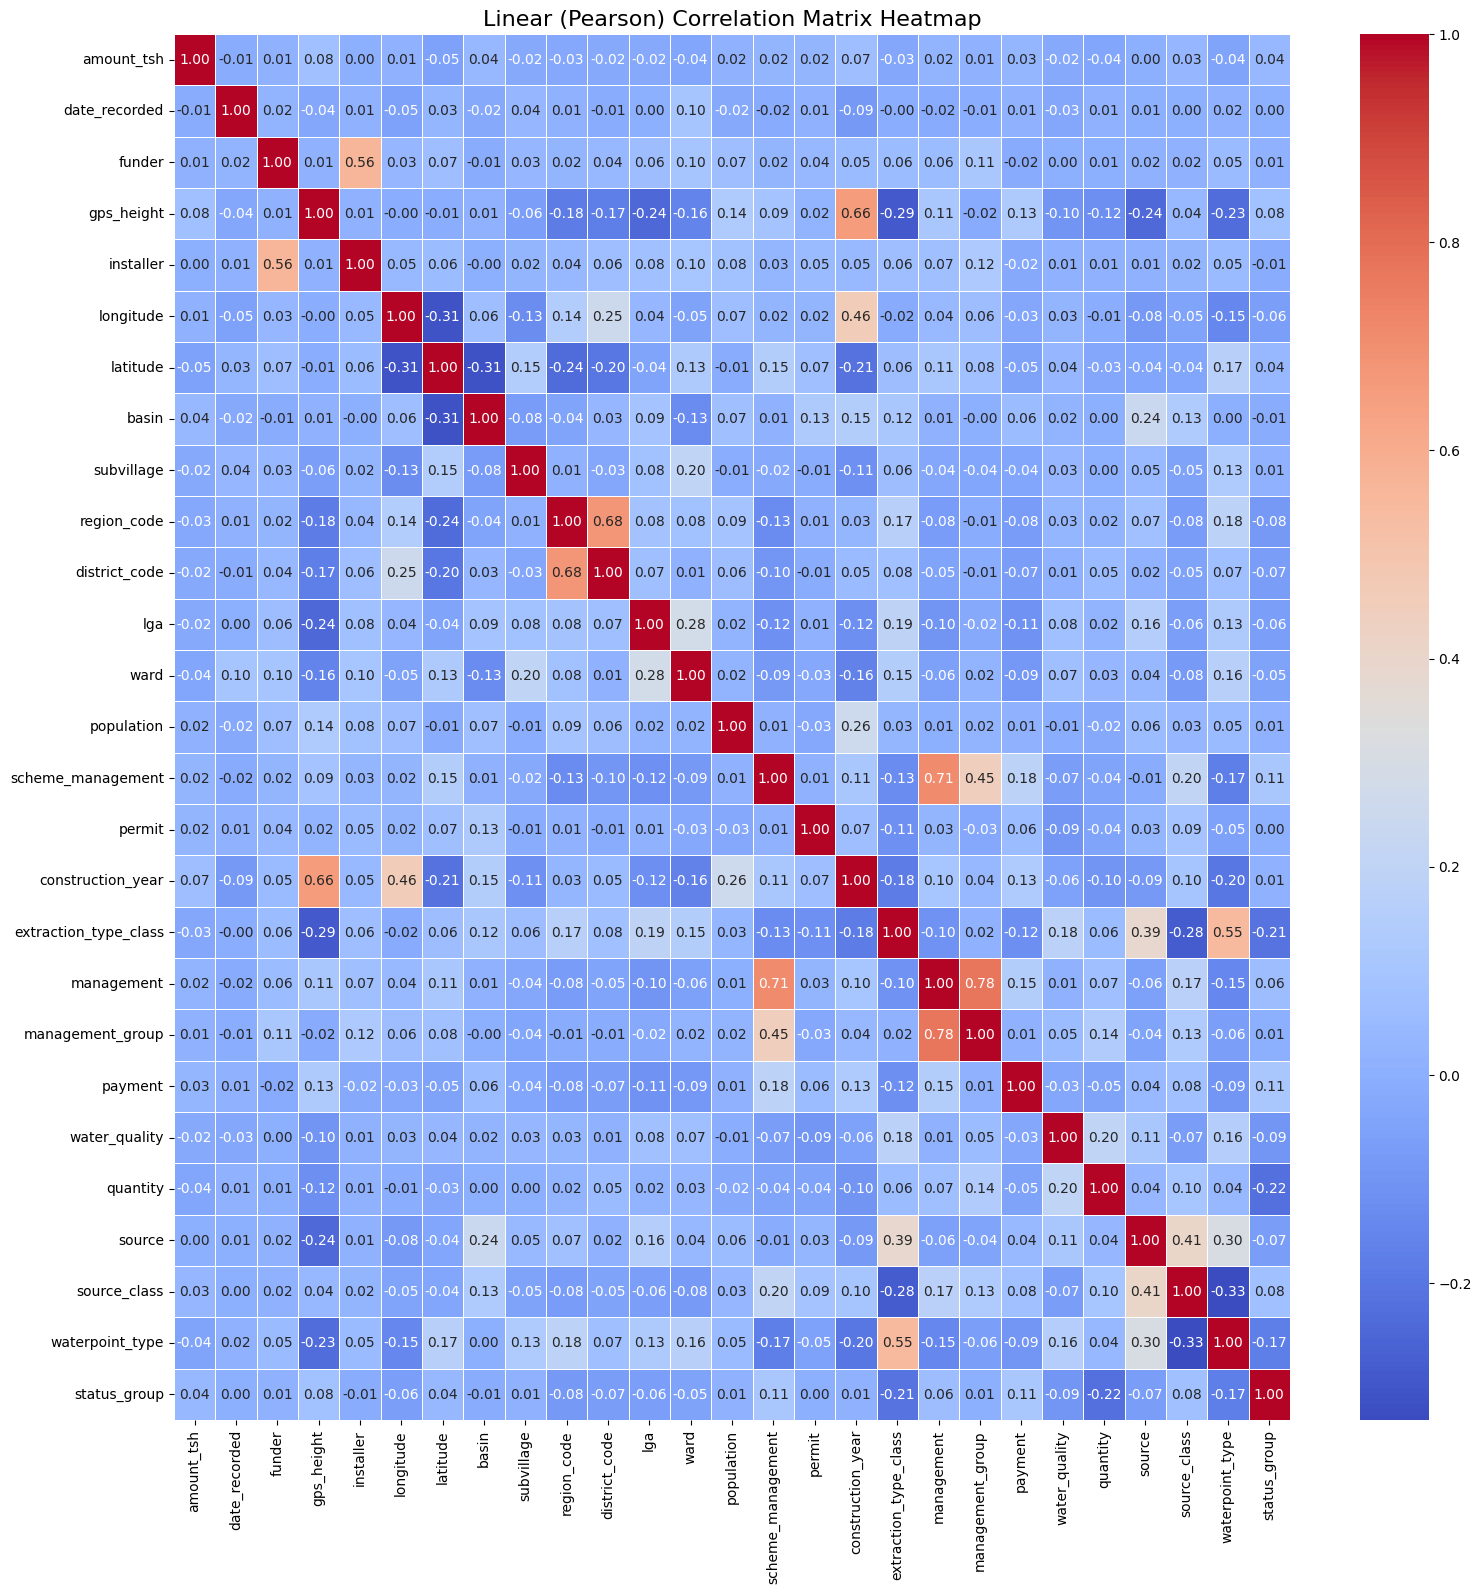

In [13]:
# Recalculate the correlation matrix
correlation_matrix = df_training.select_dtypes(include='number').corr()

# Set up the matplotlib figure
plt.figure(figsize=(18, 18))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title
plt.title("Linear (Pearson) Correlation Matrix Heatmap", fontsize=16)

# Show the plot
plt.show()

#### Handling funder and installer columns

In [9]:
df_training['installer'].value_counts()

installer
dwe                      17405
nan                       3655
government                1891
hesawa                    1395
rwe                       1206
                         ...  
luleka                       1
tlc/seleman mang'ombe        1
tasaf and mmem               1
caltaz kahama                1
hasawa                       1
Name: count, Length: 1936, dtype: int64

In [11]:
df_training['installer'] = df_training['installer'].astype(str).str.lower()
df_training['installer'].value_counts()

installer
dwe                      17405
nan                       3655
government                1891
hesawa                    1395
rwe                       1206
                         ...  
luleka                       1
tlc/seleman mang'ombe        1
tasaf and mmem               1
caltaz kahama                1
hasawa                       1
Name: count, Length: 1936, dtype: int64

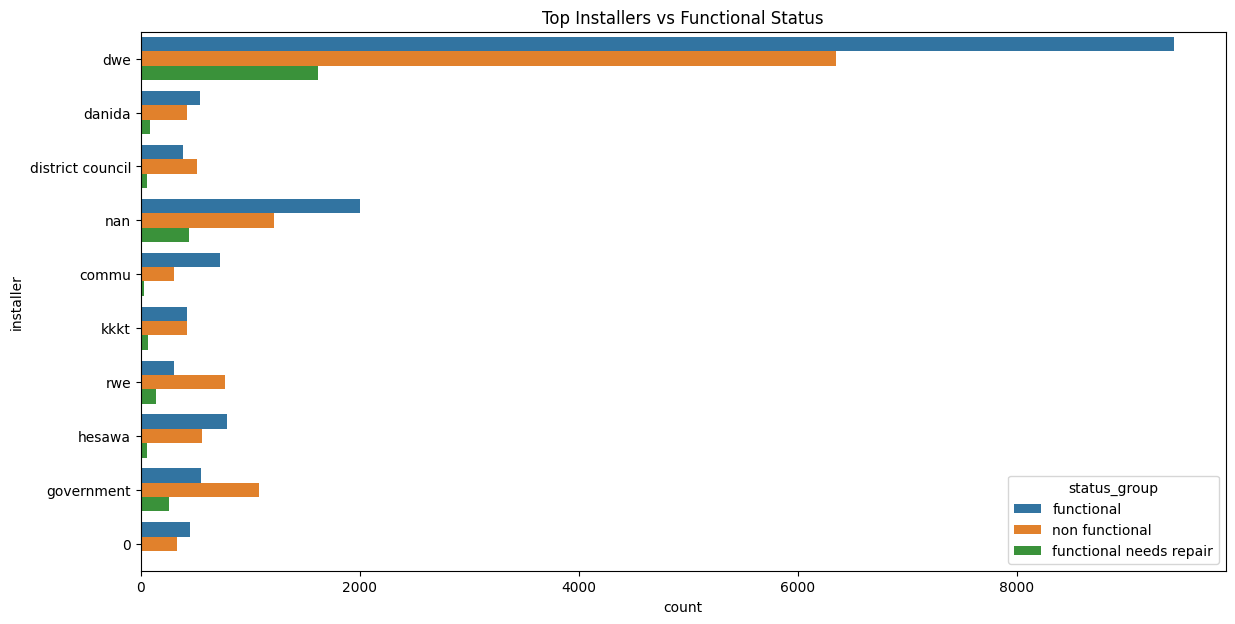

In [12]:
top_installers = df_training['installer'].value_counts().nlargest(10).index

plt.figure(figsize=(14,7))
sns.countplot(data=df_training[df_training['installer'].isin(top_installers)], 
              y='installer', 
              hue='status_group')
plt.title('Top Installers vs Functional Status')
plt.show()


In [15]:
from rapidfuzz import process, fuzz
import re

# Step 1: Clean basic text (lowercase, strip spaces)
def clean_text(val):
    val = str(val).lower().strip()
    val = re.sub(r'[^a-z0-9\s]', '', val)  # remove punctuation
    return val

df['installer_clean'] = df['installer'].fillna("unknown").apply(clean_text)

# Step 2: Get top funders by frequency
top_installers = df['installer_clean'].value_counts().head(50).index.tolist()

def match_installer(installer, top_installers):
    result = process.extractOne(installer, top_installers, scorer=fuzz.ratio)
    if result:
        match = result[0]     # matched string
        score = result[1]     # similarity score
        if score >= 80:
            return match
    return installer  # fallback: return original


df['installer_grouped'] = df['installer_clean'].apply(lambda x: match_installer(x, top_installers))


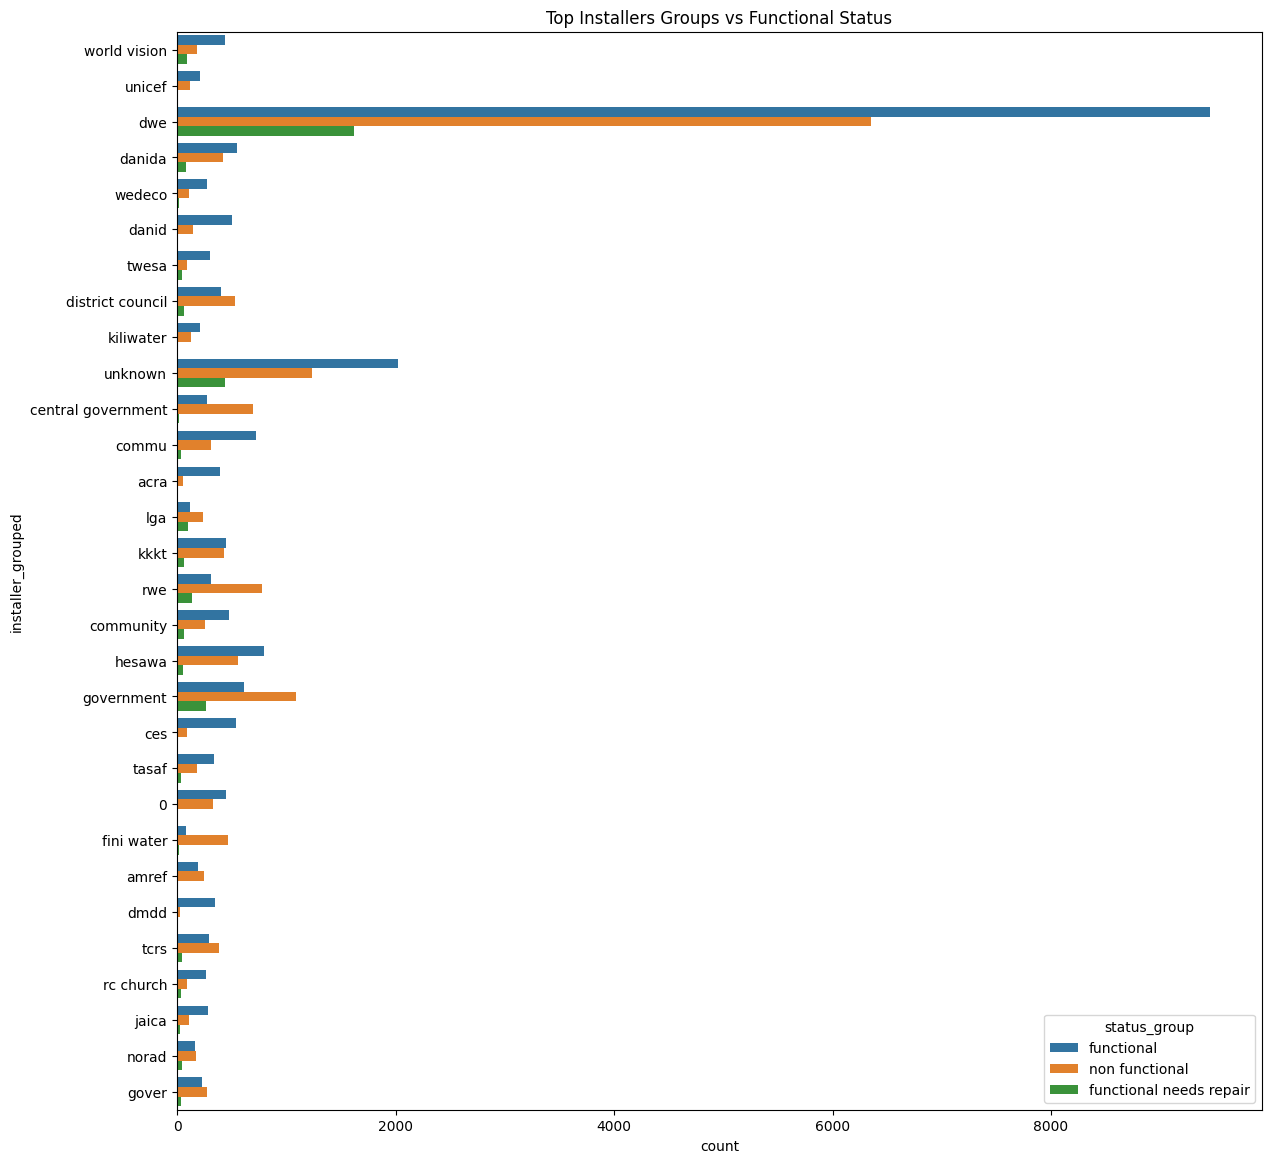

In [16]:
top_installers = df['installer_grouped'].value_counts().nlargest(30).index

plt.figure(figsize=(14,14))
sns.countplot(data=df[df['installer_grouped'].isin(top_installers)], 
              y='installer_grouped', 
              hue='status_group')
plt.title('Top Installers Groups vs Functional Status')
plt.show()

In [19]:
from rapidfuzz import process, fuzz
import re

def clean_text(val):
    val = str(val).lower().strip()
    val = re.sub(r'[^a-z0-9\s]', '', val)
    return val

def fuzzy_clean_column(df, column, top_n=50, threshold=75, force_include=None):
    col_clean = f"{column}_clean"
    col_grouped = f"{column}_grouped"
    
    df[col_clean] = df[column].fillna("unknown").apply(clean_text)
    
    top_values = df[col_clean].value_counts().head(top_n).index.tolist()
    if force_include:
        top_values += force_include
        top_values = list(set(top_values))
    
    def match_func(val):
        result = process.extractOne(val, top_values, scorer=fuzz.ratio)
        if result:
            match, score = result[0], result[1]
            if score >= threshold:
                return match
        return val

    df[col_grouped] = df[col_clean].apply(match_func)
    return df

In [20]:
df = fuzzy_clean_column(df, "installer", top_n=50, threshold=75, force_include=["hesawa", "government", "unicef", "jica","rc church","danida"])

In [43]:
# Clean spaces
df['installer_grouped'] = df['installer_grouped'].apply(lambda x: ' '.join(x.split()) if isinstance(x, str) else x)

In [79]:
# Show ALL rows in the output
#pd.set_option('display.max_rows', None)
df['installer_grouped'].value_counts()

installer_grouped
dwe                               17432
unknown                            4477
government                         3754
community                          1855
danida                             1679
hesawa                             1406
rwe                                1231
district council                    986
kkkt                                943
world vision                        715
tcrs                                710
ces                                 633
fini water                          576
tasaf                               485
village                             466
japan                               455
lga                                 455
amref                               443
acra                                443
twesa                               430
wedeco                              403
norad                               389
dmdd                                379
unicef                              343
da                    

installer ---- installer_clean ---- installer_grouped ----- installer_grouped(manual-gov,danid,commu, japan*, german*) ---- cleaning spaces --- village
1936 --------- 1904 --------------- 1740 ----------- 1709 -------- 1692

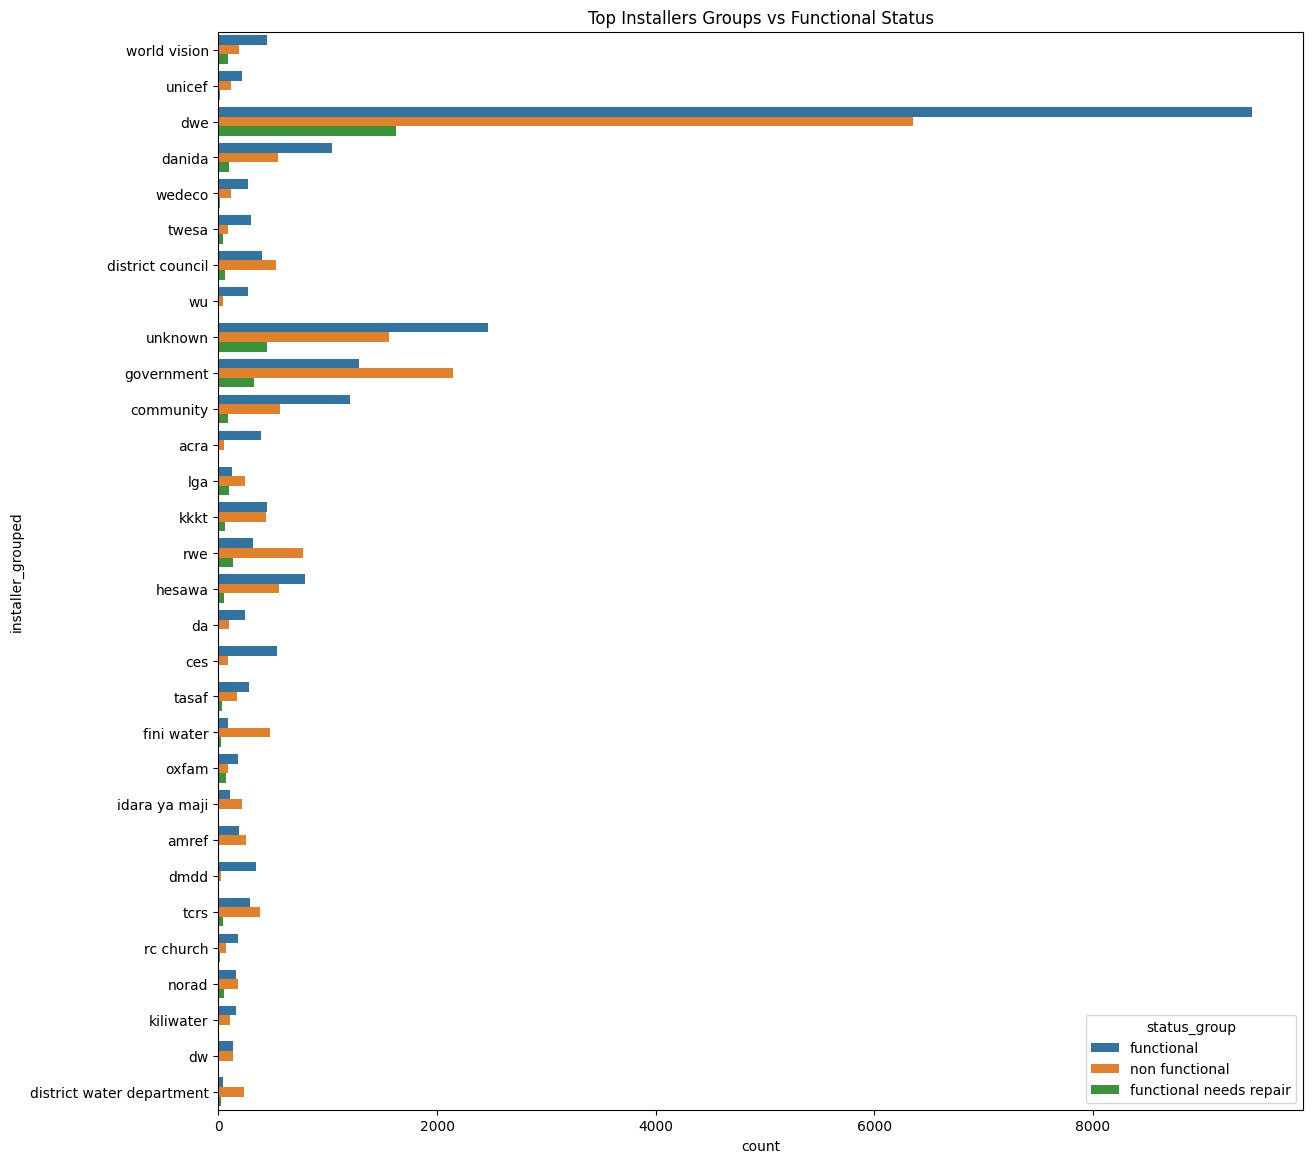

In [34]:
top_installers = df['installer_grouped'].value_counts().nlargest(30).index

plt.figure(figsize=(14,14))
sns.countplot(data=df[df['installer_grouped'].isin(top_installers)], 
              y='installer_grouped', 
              hue='status_group')
plt.title('Top Installers Groups vs Functional Status')
plt.show()

In [ ]:
df['installer_grouped'] = df['installer_grouped'].apply(
    lambda x: 'government' if 'gov' in x.lower() else x
)

In [41]:
df['installer_grouped'] = df['installer_grouped'].apply(
   lambda x: 'japan' if 'japan' in x.lower() or x.lower() == 'jica' or x.lower() == 'jaica' else x
)

In [38]:
df['installer_grouped'] = df['installer_grouped'].apply(
    lambda x: 'germany' if 'german' in x.lower() else x
)

In [32]:
manual_installer_map = {
    'danid': 'danida',
    'commu': 'community',
    '0': 'unknown'
}

df['installer_grouped'] = df['installer_grouped'].replace(manual_installer_map)

In [48]:
df_training['funder'].value_counts()

funder
government of tanzania            9084
nan                               3637
danida                            3114
hesawa                            2202
rwssp                             1374
world bank                        1349
kkkt                              1287
world vision                      1246
unicef                            1057
tasaf                              877
district council                   843
dhv                                829
private individual                 826
dwsp                               811
0                                  777
norad                              765
germany republi                    610
tcrs                               602
ministry of water                  590
water                              583
dwe                                484
netherlands                        470
hifab                              450
adb                                448
lga                                442
amref             

In [11]:
df_training['funder'] = df_training['funder'].astype(str).str.lower()
df_training['funder'].value_counts()

funder
government of tanzania    9084
nan                       3637
danida                    3114
hesawa                    2202
rwssp                     1374
                          ... 
nmdc india                   1
bukwang church saint         1
ded/rwssp                    1
kwasenenge group             1
getdsc00                     1
Name: count, Length: 1897, dtype: int64

In [58]:
# Clean spaces
df['funder_grouped'] = df['funder_grouped'].apply(lambda x: ' '.join(x.split()) if isinstance(x, str) else x)

In [29]:
df['funder_grouped'].value_counts()

funder_grouped
government of tanzania    9084
unknown                   3668
danida                    3117
hesawa                    2221
rwssp                     1417
                          ... 
misri government             1
pwc                          1
nyamuhanga maro              1
lake tanganyika basin        1
getdsc00                     1
Name: count, Length: 1754, dtype: int64

In [32]:
df['funder_clean'].value_counts()

funder_clean
government of tanzania    9084
unknown                   3641
danida                    3114
hesawa                    2202
rwssp                     1374
                          ... 
gil cafechurch               1
ldcdd                        1
kaaya                        1
kalitesi                     1
getdsc00                     1
Name: count, Length: 1896, dtype: int64

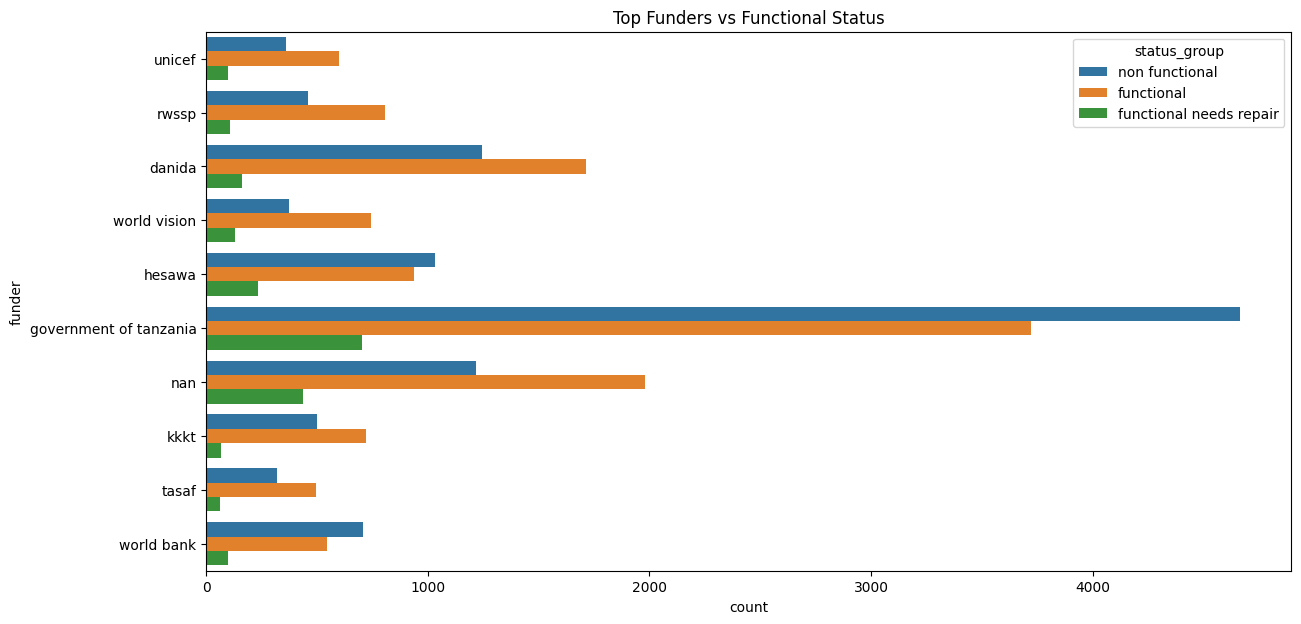

In [49]:
top_funders = df_training['funder'].value_counts().nlargest(10).index

plt.figure(figsize=(14,7))
sns.countplot(data=df_training[df_training['funder'].isin(top_funders)], 
              y='funder', 
              hue='status_group')
plt.title('Top Funders vs Functional Status')
plt.show()


In [50]:
from rapidfuzz import process, fuzz
import re

# Step 1: Clean basic text (lowercase, strip spaces)
def clean_text(val):
    val = str(val).lower().strip()
    val = re.sub(r'[^a-z0-9\s]', '', val)  # remove punctuation
    return val

df['funder_clean'] = df['funder'].fillna("unknown").apply(clean_text)

# Step 2: Get top funders by frequency
top_funders = df['funder_clean'].value_counts().head(50).index.tolist()

def match_funder(funder, top_funders):
    result = process.extractOne(funder, top_funders, scorer=fuzz.ratio)
    if result:
        match = result[0]     # matched string
        score = result[1]     # similarity score
        if score >= 80:
            return match
    return funder  # fallback: return original


df['funder_grouped'] = df['funder_clean'].apply(lambda x: match_funder(x, top_funders))


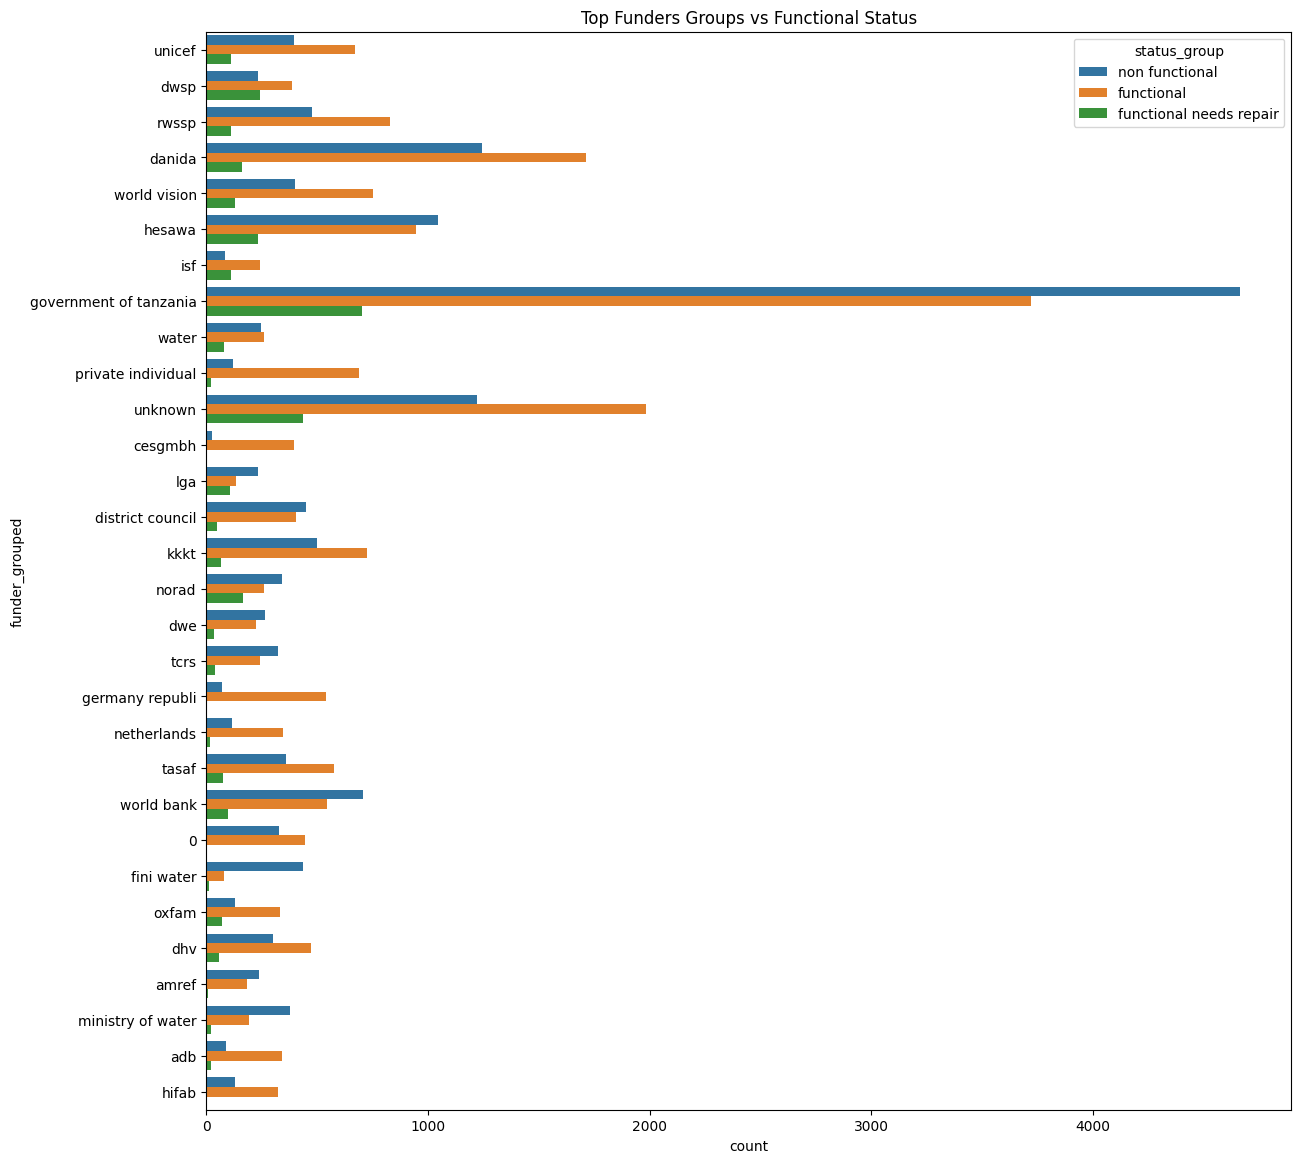

In [51]:
top_funders = df['funder_grouped'].value_counts().nlargest(30).index

plt.figure(figsize=(14,14))
sns.countplot(data=df[df['funder_grouped'].isin(top_funders)], 
              y='funder_grouped', 
              hue='status_group')
plt.title('Top Funders Groups vs Functional Status')
plt.show()

In [52]:
from rapidfuzz import process, fuzz
import re

def clean_text(val):
    val = str(val).lower().strip()
    val = re.sub(r'[^a-z0-9\s]', '', val)
    return val

def fuzzy_clean_column(df, column, top_n=50, threshold=75, force_include=None):
    col_clean = f"{column}_clean"
    col_grouped = f"{column}_grouped"
    
    df[col_clean] = df[column].fillna("unknown").apply(clean_text)
    
    top_values = df[col_clean].value_counts().head(top_n).index.tolist()
    if force_include:
        top_values += force_include
        top_values = list(set(top_values))
    
    def match_func(val):
        result = process.extractOne(val, top_values, scorer=fuzz.ratio)
        if result:
            match, score = result[0], result[1]
            if score >= threshold:
                return match
        return val

    df[col_grouped] = df[col_clean].apply(match_func)
    return df

In [53]:
df = fuzzy_clean_column(df, "funder", top_n=50, threshold=75, force_include=["hesawa", "government of tanzania", "unicef", "jica","rc church"])

In [54]:
# Map values containing "japan" (case-insensitive) or "jica" to "japan"
df['funder_grouped'] = df['funder_grouped'].apply(
    lambda x: 'japan' if 'japan' in x.lower() or x.lower() == 'jica' else x
)

In [55]:
df['funder_grouped'] = df['funder_grouped'].apply(
    lambda x: 'germany' if 'german' in x.lower() or 'gmbh' in x.lower() else x
)

In [78]:
df['funder_grouped'] = df['funder_grouped'].apply(
    lambda x: 'village' if 'village' in x.lower() else x
)
df['installer_grouped'] = df['installer_grouped'].apply(
    lambda x: 'village' if 'village' in x.lower() else x
)

In [56]:
manual_funder_map = {
    'fini water': 'ministry of water',
    #'dwe': 'ministry of water',
    '0': 'unknown',
   # 'district council': 'government of tanzania',
    #'lga': 'government of tanzania',
    'germany republi': 'germany',
    #'rwssp': 'world bank',
    'adb':'african development bank'
}

df['funder_grouped'] = df['funder_grouped'].replace(manual_funder_map)

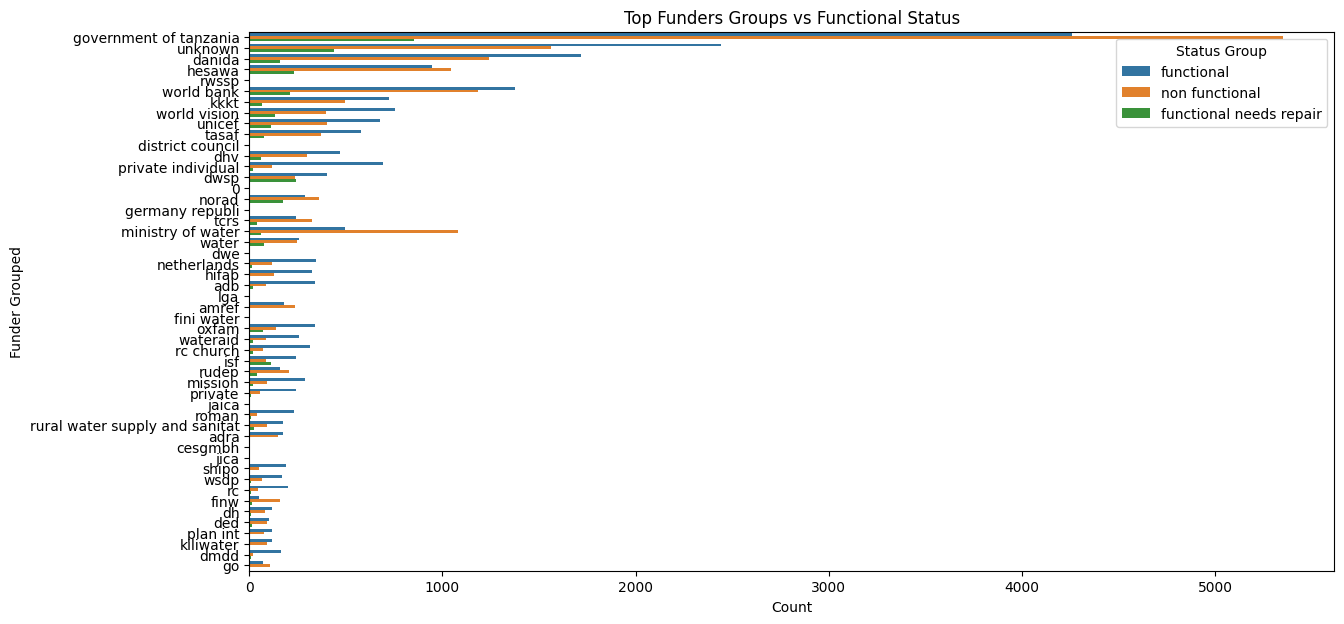

In [69]:
plt.figure(figsize=(14, 7))
sns.countplot(data=df, y='funder_grouped', order=top_funders, hue='status_group')
plt.title('Top Funders Groups vs Functional Status')
plt.xlabel('Count')
plt.ylabel('Funder Grouped')
plt.legend(title='Status Group')
plt.show()

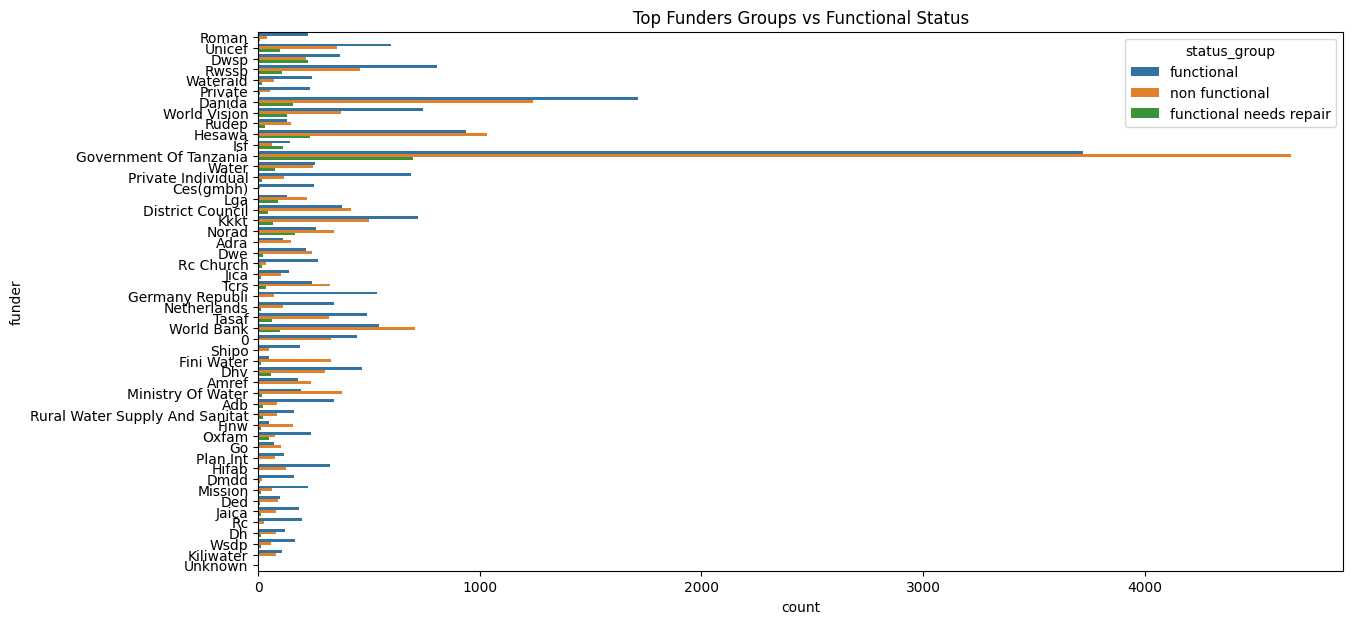

In [68]:
top_funders = df['funder_clean'].value_counts().nlargest(50).index

plt.figure(figsize=(14,7))
sns.countplot(data=df[df['funder_clean'].isin(top_funders)], 
              y='funder', 
              #order=top_funders,
              hue='status_group')
plt.title('Top Funders Groups vs Functional Status')
plt.show()

### Ways to check redundancy between funder and installer

##### ▶️ (A) Cross-tabulation / Heatmap

- Make a crosstab: a table showing how many times each (funder, installer) pair occurs.
- If funder and installer are always the same for each row (or almost always), then they are redundant.
- If they vary a lot, they each bring different information.

Interpretation:

- If you see a strong diagonal line = strong duplication (funder ≈ installer).
- If you see lots of spread = they are distinct.

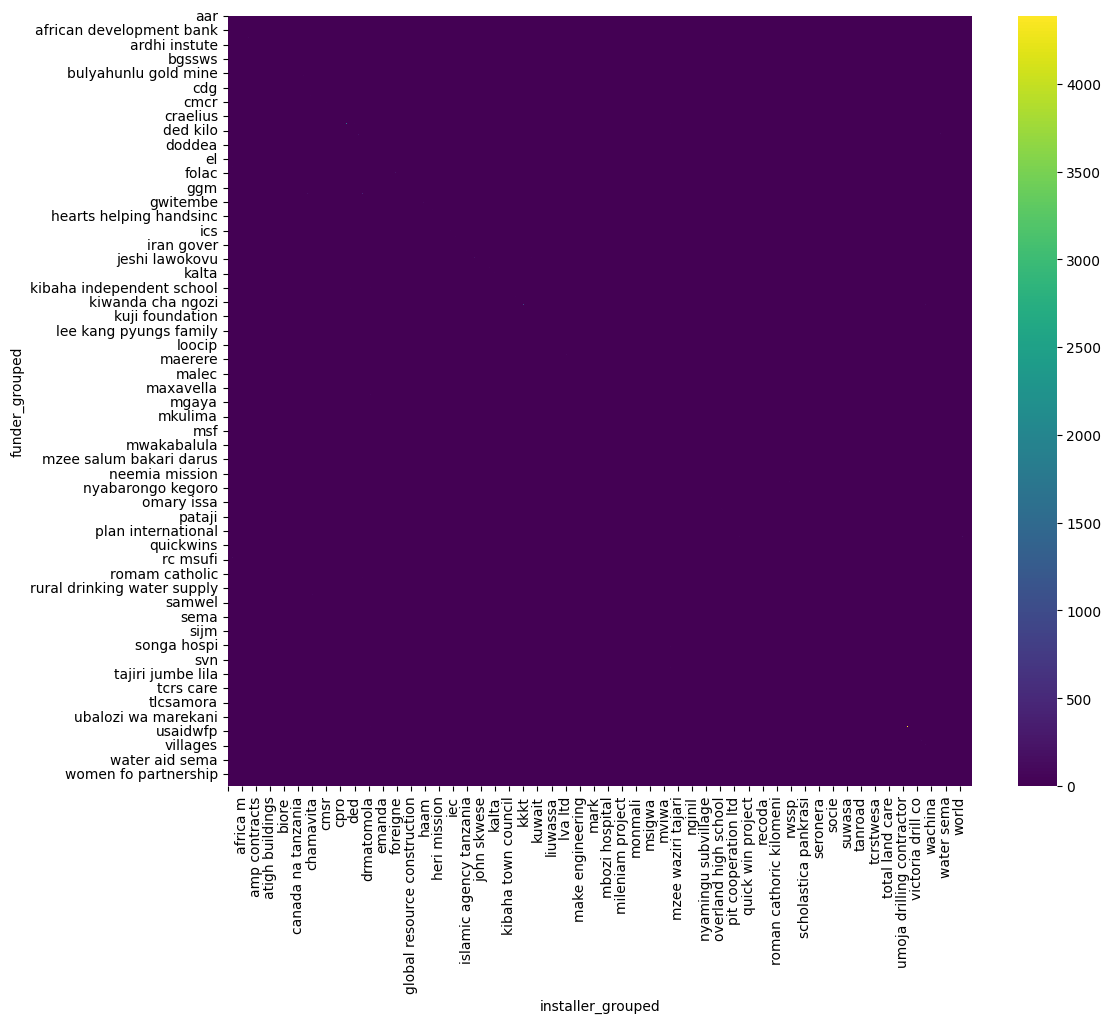

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suppose your dataframe is called df
crosstab = pd.crosstab(df['funder_grouped'], df['installer_grouped'])

# Check how sparse or diagonal it is
plt.figure(figsize=(12,10))
sns.heatmap(crosstab, cmap='viridis')
plt.show()

##### ▶️ (B) Joint feature importance in a predictive model

- Build a quick model (e.g., Random Forest or XGBoost) to predict your target (e.g., pump functionality).
- Check feature importance: are both funder and installer important?
- If only one is important, maybe the other can be dropped.

Interpretation:

- If both have high importance → keep both.
- If only one matters → drop the weaker one.

In [61]:
from sklearn.ensemble import RandomForestClassifier

# Simple feature encoding
X = df[['funder_grouped', 'installer_grouped']].fillna('Unknown')
X = X.apply(lambda col: pd.factorize(col)[0])  # simple label encoding
y = df['status_group']  # your target

model = RandomForestClassifier()
model.fit(X, y)

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
print(feature_importance)

funder_grouped       0.561677
installer_grouped    0.438323
dtype: float64


##### ▶️ (C) Mutual Information (nonlinear dependence check)

- Sometimes features aren't linearly correlated, but still share mutual information (inform each other).
- You can compute mutual information score between funder and installer.

This will tell you if each feature adds unique, useful signal to predicting your label.

In [62]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X, y, discrete_features=True)
print(pd.Series(mi, index=X.columns))

funder_grouped       0.112414
installer_grouped    0.105775
dtype: float64


##### ▶️ (D) Simple frequency and uniqueness check

- Are there lots of unique funder that map to the same installer (or vice versa)?
- If a funder always has exactly one installer, they are almost duplicates.
- If they map to many different values, they carry different information.

In [65]:
print(df.groupby('funder_grouped')['installer_grouped'].nunique().sort_values())
print(df.groupby('installer_grouped')['funder_grouped'].nunique().sort_values())

funder_grouped
mfuko wa jimbo                      1
nyanza road                         1
nyangere                            1
nyamuhanga maro                     1
nyamongo gold mining                1
nyamingu subvillage                 1
nyamasagi                           1
nyakaho mwita                       1
nyahale                             1
nyabweta                            1
nyabibuye islamic center            1
nyabarongo kegoro                   1
nssf                                1
noshadi                             1
noshad                              1
norway aid                          1
norplan                             1
nordic                              1
norani                              1
noradrudep                          1
nyeisa                              1
nyitamboka                          1
o                                   1
oakzion and bugango b commu         1
overnment                           1
overland high school               

| Check              | Purpose           | Keep both if... | Drop one if...  |
| :----------------- | :---------------- | :-------------- | :-------------- |
| Cross-tabulation   | Visual redundancy | Spread out      | Mostly diagonal |
| Feature importance | Predictive power  | Both matter     | One matters     |
| Mutual Information | Shared info       | Both useful     | One redundant   |
| Group uniqueness   | Mapping check     | Many-to-many    | One-to-one      |


In [76]:
# See top funder-installer pairs
crosstab.stack().sort_values(ascending=False).head(600)

funder_grouped                  installer_grouped            
unknown                         unknown                          4387
government of tanzania          dwe                              4256
                                government                       2538
danida                          danida                           1675
hesawa                          dwe                              1308
rwssp                           dwe                               942
kkkt                            kkkt                              939
hesawa                          hesawa                            866
world vision                    world vision                      694
dhv                             dwe                               678
dwsp                            dwe                               665
government of tanzania          rwe                               657
danida                          dwe                               627
germany                     

Mutual Information